✍ Алгоритмов кластеризации настолько много, что по ним можно сделать отдельный курс. И, как вы можете догадаться, не существует такого метода кластеризации, который всегда будет выдавать хорошие результаты — всё зависит от того, с какими данными вы работаете.

На сегодняшний день существует более 40 видов кластеризации, но общепринятой системы классификации алгоритмов кластеризации не существует.

В этом и последующих юнитах мы познакомимся с некоторыми популярными алгоритмами кластеризации:

- иерархической кластеризацией,
- EM-алгоритмами кластеризации,
- спектральной кластеризацией,
- кластеризацией на основе плотности.

Мы рассмотрим различные подходы, их плюсы и минусы, а также применение.

**Дендрограмма**  — это древовидная диаграмма, которая содержит  уровней. Каждый уровень — это шаг укрупнения кластеров.
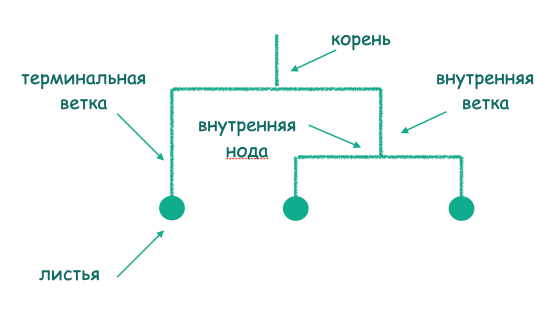

Например, дендрограмма для кластеризации трёх видов ирисов будет выглядеть следующим образом:

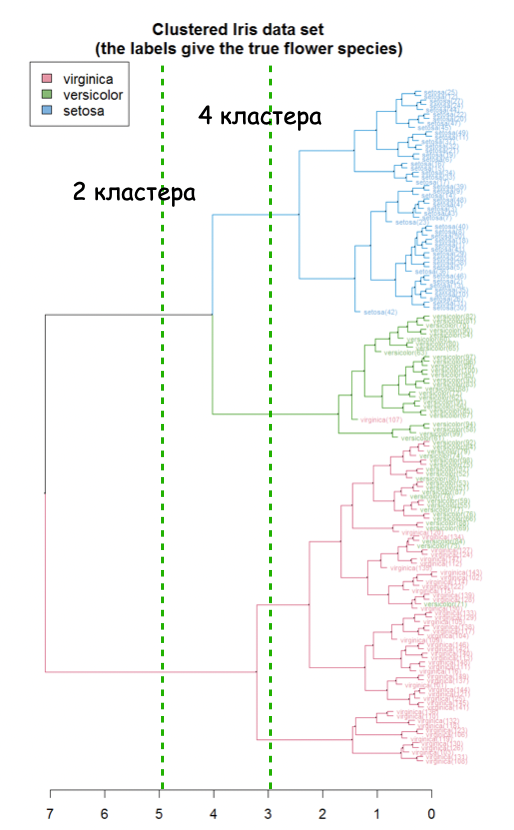
Источник изображения
Справа расположены листья дендрограммы. Внизу дендрограммы отложена схожесть объектов. Количество уровней дендрограммы соответствует числу шагов слияния или разделения кластеров. На листьях находятся исходные объекты. Далее мы объединяем эти объекты в маленькие группы — это первый шаг кластеризации. После этого с каждым шагом объекты образуют всё большие и большие кластеры, пока на последнем шаге не образуется один большой кластер (корень дендрограммы), содержащий все три вида ирисов. Для определения количества кластеров на каждом шаге мы можем мысленно проводить вертикальную линию и смотреть, сколько внутренних веток пересекла эта линия. 

Наши линии на картинке пересекают две и четыре линии. Это означает, что на этих шагах данные делятся на два или четыре кластера.

In [2]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

import plotly
import plotly.express as px
# загружаем данные
df = pd.read_csv("data/pokemon.csv")
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()
X = df[['Attack', 'Defense']]

Базовые параметры, которые необходимо передать в AgglomerativeClustering:

- n_clusters — количество кластеров; по умолчанию — 2.
- linkage — метод определения расстояния между кластерами, которое мы рассматривали выше. Можно выбрать single, ward, average, complete; по умолчанию используется ward.

In [3]:
from sklearn.cluster import AgglomerativeClustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)

agglomerative_clustering.fit(X)

agglomerative_clustering.labels_

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

## 5. EM-алгоритмы кластеризации

КАК ЗАПУСТИТЬ EM-КЛАСТЕРИЗАЦИЮ?

Запустим алгоритм на датасете покемонов и попробуем кластеризовать их по силе атаки и уровню защиты:


In [4]:

# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

### Основные параметры, которые необходимо задать для запуска алгоритма GaussianMixture:

- n_components — количество кластеров.
- random_state — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

In [6]:
from sklearn.mixture import GaussianMixture
help(GaussianMixture)
#Help on class GaussianMixture in module sklearn.mixture._gaussian_mixture:

class GaussianMixture(sklearn.mixture._base.BaseMixture)

SyntaxError: invalid syntax (2643873374.py, line 5)